In [13]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [15]:
import yfinance as yf

# Symbol dla złota na Yahoo Finance to "GC=F"
symbol = 'GC=F'

# Pobranie danych historycznych z ostatnich 10 lat
gold = yf.download(symbol, start='2011-01-01', end='2024-03-25')

print(gold)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2011-01-03  1415.599976  1423.900024  1413.699951  1422.599976  1422.599976   
2011-01-04  1409.599976  1410.900024  1375.800049  1378.500000  1378.500000   
2011-01-05  1383.400024  1384.000000  1364.199951  1373.400024  1373.400024   
2011-01-06  1374.800049  1376.500000  1368.900024  1371.400024  1371.400024   
2011-01-07  1372.699951  1377.199951  1355.500000  1368.500000  1368.500000   
...                 ...          ...          ...          ...          ...   
2024-03-18  2146.199951  2160.699951  2146.199951  2160.699951  2160.699951   
2024-03-19  2156.100098  2156.300049  2156.100098  2156.300049  2156.300049   
2024-03-20  2157.300049  2185.899902  2150.899902  2157.899902  2157.899902   
2024-03-21  2207.000000  2211.600098  2182.399902  2182.399902  2182.399902   
2024-03-22  2179.199951  2179.600098  2157.500000  2

1. Open: Cena otwarcia - cena złota na początku sesji handlowej.
2. 
High: Cena najwyższa - najwyższa cena złota osiągnięta podczas sesji handlowej
3. 
Low: Cena najniższa - najniższa cena złota osiągnięta podczas sesji handlowe
4. .
Close: Cena zamknięcia - cena złota na zakończenie sesji handlow
5. j.
Adj Close: Dostosowana cena zamknięcia - cena zamknięcia uwzględniająca wszelkie korekty, takie jak dywidendy, podziały akcji 
6. tp.
Volume: Wolumen - liczba transakcji (handlowych) wykonanych podczas sesji handlowej.

In [16]:
gold.reset_index(inplace=True)
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325 entries, 0 to 3324
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3325 non-null   datetime64[ns]
 1   Open       3325 non-null   float64       
 2   High       3325 non-null   float64       
 3   Low        3325 non-null   float64       
 4   Close      3325 non-null   float64       
 5   Adj Close  3325 non-null   float64       
 6   Volume     3325 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 182.0 KB


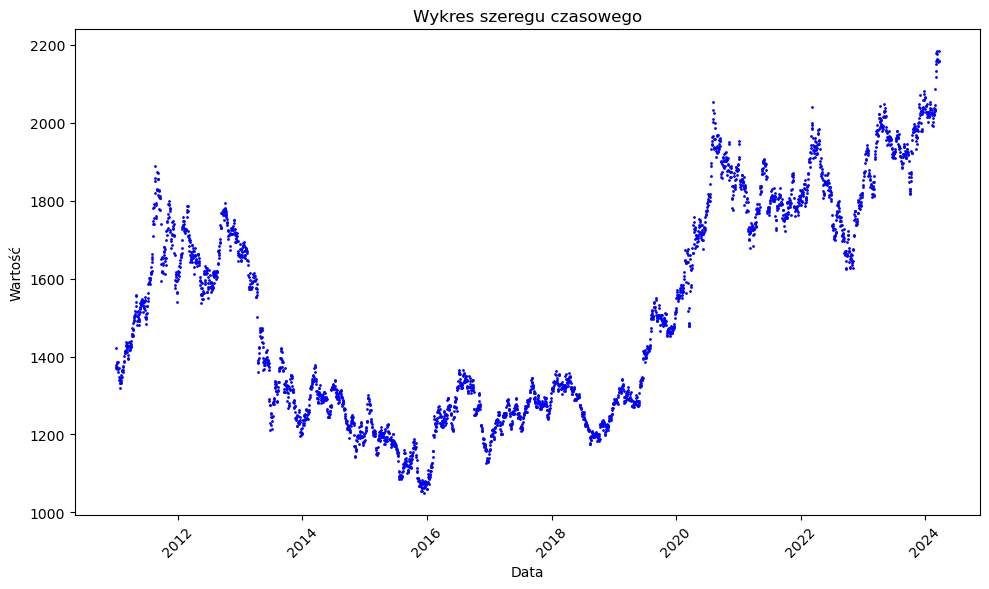

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(gold.Date, gold.Close, 'o', markersize=1, color='blue')  # 'o' oznacza punkty
plt.title('Wykres szeregu czasowego')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.xticks(rotation=45)  # Obrócenie dat na osi x dla lepszej czytelności
plt.tight_layout()
plt.show()

In [18]:
# Reading file and displaying first rows to see the structure of data - unemployment
unemployment = pd.read_excel('files/general_unemployment.xlsx', sheet_name = 1)
unemployment.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [19]:
# Viewing columns and their datatypes
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


## Exploratory Data Analysis (EDA)

In [20]:
# Cleaning up data - drop null data and irrelevant columns
unemployment = unemployment[unemployment['Atrybut'] != 'n']
unemployment.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
unemployment.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
unemployment.head()

,Miesiące,Płeć,Rok,Osoby
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [21]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [22]:
# Applying month map and creating date column
unemployment['Month'] = unemployment['Miesiące'].map(month_mapping)
unemployment.rename(columns = {'Rok' : 'Year'}, inplace = True)
unemployment['Data'] = pd.to_datetime(unemployment[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
unemployment['Osoby'] = unemployment['Osoby'].astype(int)
unemployment.head()

,Miesiące,Płeć,Year,Osoby,Month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


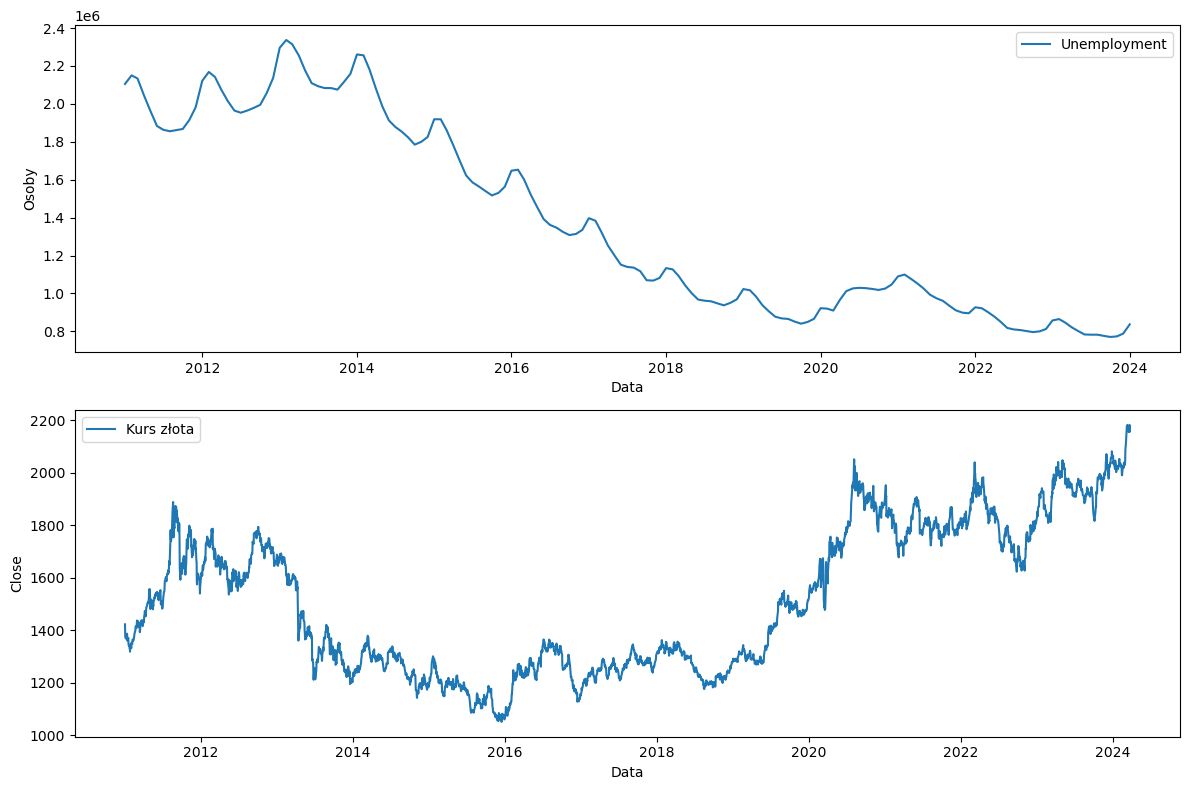

In [23]:
fig = plt.figure(figsize = [12,8])

plt.subplot(2, 1, 1)
sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)

plt.subplot(2, 1, 2)
sns.lineplot(
    x="Date",
    y="Close",
    data=gold,
    label="Kurs złota"
)
plt.xlabel("Data")
plt.tight_layout()

plt.legend()

plt.show()

In [24]:
# plt.figure(figsize=(10, 5))
# plt.style.use('seaborn')

# # Unemployment data
# ax1 = sns.lineplot(
#     x="Data",
#     y="Osoby",
#     data=unemployment[unemployment['Płeć'] == "ogółem"],
#     label="Unemployment"
# )
# ax1.set_xlabel("Data")
# ax1.set_ylabel("Osoby", color='tab:blue')
# ax1.tick_params(axis='y', labelcolor='tab:blue')

# # Currency data
# ax2 = ax1.twinx()
# sns.lineplot(
#     x="Date",
#     y="Close",
#     data=gold,
#     ax=ax2,
#     color='tab:red',
#     label="Cena złota"
# )
# ax2.set_ylabel("Cena złota", color='tab:red')
# ax2.tick_params(axis='y', labelcolor='tab:red')

# # Combining legends
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# # Removing duplicate legend
# ax2.get_legend().remove()


# plt.title("Unemployment and Gold Price Data over time")
# plt.show()

In [25]:
unemployment.Data

0     2011-01-01
1     2012-01-01
2     2013-01-01
3     2014-01-01
4     2015-01-01
         ...    
498   2019-12-01
499   2020-12-01
500   2021-12-01
501   2022-12-01
502   2023-12-01
Name: Data, Length: 471, dtype: datetime64[ns]

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [27]:
data = unemployment[unemployment['Płeć'] == "ogółem"][['Data', 'Osoby']].sort_values(by='Data')
data.set_index('Data', inplace=True)
data

,Osoby
Data,
2011-01-01,2104986
2011-02-01,2150233
2011-03-01,2133916
2011-04-01,2043516
2011-05-01,1962587
...,...
2023-09-01,775987
2023-10-01,770446
2023-11-01,773403


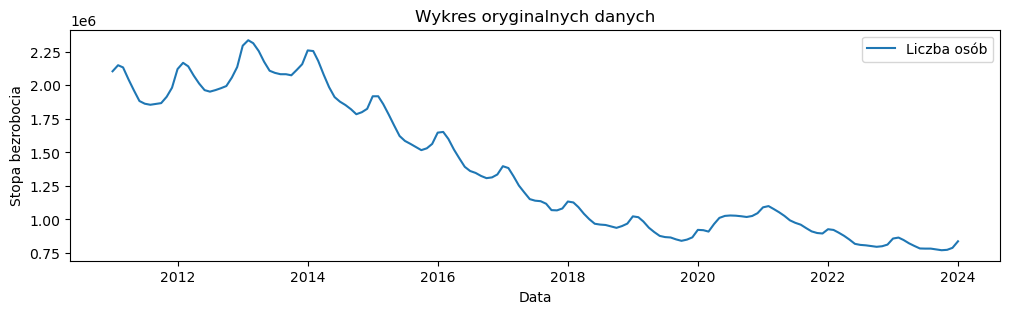

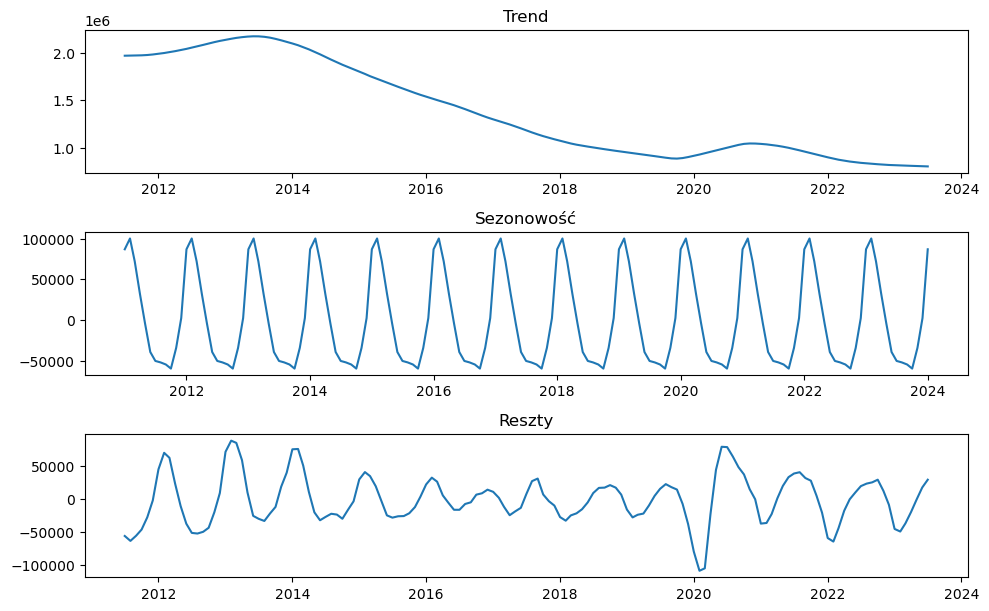

In [28]:
plt.figure(figsize=(12, 3))
plt.plot(data.index, data['Osoby'], label='Liczba osób')
plt.title('Wykres oryginalnych danych')
plt.xlabel('Data')
plt.ylabel('Stopa bezrobocia')
plt.legend()
plt.show()

# Dekompozycja szeregu czasowego
dekompozycja = sm.tsa.seasonal_decompose(data, model='additive')

# Wykresy trendu, sezonowości i reszt
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(dekompozycja.trend)
plt.title('Trend')

plt.subplot(412)
plt.plot(dekompozycja.seasonal)
plt.title('Sezonowość')

plt.subplot(413)
plt.plot(dekompozycja.resid)
plt.title('Reszty')

plt.tight_layout()
plt.show()

In [30]:
data.to_csv("files/general_data.csv")